##### Imports

In [1]:
import numpy as np
import pandas as pd
import h5py

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from tqdm.keras import TqdmCallback

import wandb
from wandb.keras import WandbCallback

from model_parts import (
    get_baseline_cnn_model, get_basic_cnn_model, get_basic_rnn_model)
from data_io import get_data
from utils import save_predictions, compute_metrics, display_result

In [2]:
%load_ext autoreload
%autoreload 2

#### Load data

In [3]:
X_train_mit, y_train_mit, X_test_mit, y_test_mit = get_data(dataset='mitbih')

In [4]:
X_train_pt, y_train_pt, X_test_pt, y_test_pt = get_data(dataset='ptbdb')

# Modified CNN Model

## MIT BIH

#### W&B setup

In [25]:
run = wandb.init(
    project='ML4HC-project4',
    config={
        'epochs': 128,
        'batch_size': 32,
        'loss_function': 'sparse_categorical_crossentropy',
        'architecture': 'Basic CNN',
        'dataset': 'MITBIH',
        'mode': 'training',
        'ndims': [32, 128, 128, 256],
        'kernel_sizes': [5, 5, 3, 3],
        'dropout': 0.2,
        'dense_size': 128,
        'learning_rate': 1e-3,
        'schedule_lr': False
    })

config_mit = wandb.config

wandb: wandb version 0.10.31 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


#### Model

In [26]:
original_model = get_basic_cnn_model(config_mit, nclass=5)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 183, 32)           192       
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 179, 32)           5152      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 89, 32)            0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 89, 32)            0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 85, 128)           20608     
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 81, 128)          

In [27]:
file_path_mit = './models/basic_cnn/cnn_mitbih.h5'

checkpoint = ModelCheckpoint(
    file_path_mit, monitor='val_acc', verbose=1,
    save_best_only=True, mode='max')
early = EarlyStopping(
    monitor='val_acc', mode='max', patience=5, verbose=1)
redonplat = ReduceLROnPlateau(
    monitor='val_acc', mode='max', patience=3, verbose=2)

#### Training

In [28]:
history = original_model.fit(
    X_train_mit, y_train_mit,
    epochs=config_mit.epochs,
    batch_size=config_mit.batch_size,
    verbose=0,
    callbacks=[
        checkpoint, early, redonplat,
        WandbCallback(), TqdmCallback(verbose=1)],
    validation_split=0.1)


Epoch 00001: val_acc improved from -inf to 0.95683, saving model to ./models/basic_cnn/cnn_mitbih.h5

Epoch 00002: val_acc improved from 0.95683 to 0.97088, saving model to ./models/basic_cnn/cnn_mitbih.h5

Epoch 00003: val_acc improved from 0.97088 to 0.97487, saving model to ./models/basic_cnn/cnn_mitbih.h5

Epoch 00004: val_acc improved from 0.97487 to 0.97773, saving model to ./models/basic_cnn/cnn_mitbih.h5

Epoch 00005: val_acc improved from 0.97773 to 0.98024, saving model to ./models/basic_cnn/cnn_mitbih.h5

Epoch 00006: val_acc improved from 0.98024 to 0.98196, saving model to ./models/basic_cnn/cnn_mitbih.h5

Epoch 00007: val_acc improved from 0.98196 to 0.98230, saving model to ./models/basic_cnn/cnn_mitbih.h5

Epoch 00008: val_acc did not improve from 0.98230

Epoch 00009: val_acc improved from 0.98230 to 0.98424, saving model to ./models/basic_cnn/cnn_mitbih.h5

Epoch 00010: val_acc did not improve from 0.98424

Epoch 00011: val_acc did not improve from 0.98424

Epoch 000

In [29]:
original_model.load_weights(file_path_mit)


#### Evaluation

In [30]:
test_preds_mit = np.argmax(
    original_model.predict(X_test_mit, batch_size=512), axis=-1)

r = compute_metrics(y_test_mit, test_preds_mit)

f1_weighted = r['f1-weighted']
f1_macro = r['f1-macro']
acc = r['accuracy']
b_acc = r['balanced_accuracy']

wandb.log({'Test Accuracy': acc})
wandb.log({'Test F1 Weighted': f1_weighted})
wandb.log({'Test F1 Macro': f1_macro})
wandb.log({'Test Balanced Accuracy': b_acc})

f1 score micro:           0.98716
f1 score macro:           0.92469
f1 score weighted:        0.98677
accuracy score:           0.98716
balanced accuracy score:  0.89859


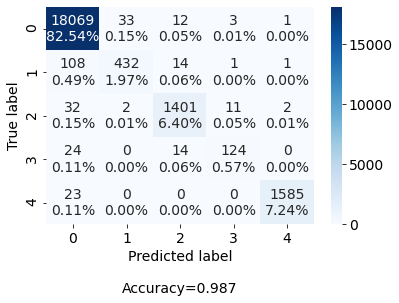

In [31]:
display_result(y_test_mit, test_preds_mit)

In [32]:
run.join()

epoch,29
loss,0.02849
acc,0.99091
val_loss,0.03693
val_acc,0.98938
lr,0.0
_runtime,304
_timestamp,1622839184
_step,33
best_val_loss,0.03693
best_epoch,29


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,▁▅▆▆▆▇▇▇▇▇▇▇▇█████████████████
val_loss,█▅▄▃▃▂▃▂▂▃▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▅▅▆▆▆▆▇▆▆▅██████████████████
lr,████████████▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
_runtime,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇██████
_timestamp,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇██████
_step,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇███
Test Accuracy,▁
Test F1 Weighted,▁


### Predictions

In [33]:
save_predictions(original_model, X_test_mit, 'basic_cnn', 'test_mitbih')
save_predictions(original_model, X_train_mit, 'basic_cnn', 'train_mitbih')

## PTBDB

#### W&B setup

In [66]:
run = wandb.init(
    project='ML4HC-project4',
    config={
        'epochs': 128,
        'batch_size': 32,
        'loss_function': 'sparse_categorical_crossentropy',
        'architecture': 'Basic CNN',
        'dataset': 'PTBDB',
        'mode': 'training',
        'ndims': [32, 128, 128, 256],
        'kernel_sizes': [5, 5, 3, 3],
        'dropout': 0.2,
        'dense_size': 128,
        'learning_rate': 1e-3,
        'schedule_lr': False
    })

config_pt = wandb.config

wandb: wandb version 0.10.31 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


#### Model

In [67]:
original_model = get_basic_cnn_model(config_pt, nclass=5)

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 183, 32)           192       
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 179, 32)           5152      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 89, 32)            0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 89, 32)            0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 85, 128)           20608     
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 81, 128)         

In [68]:
file_path_pt = './models/basic_cnn/cnn_ptbdb.h5'

checkpoint = ModelCheckpoint(
    file_path_pt, monitor='val_acc', verbose=1,
    save_best_only=True, mode='max')
early = EarlyStopping(
    monitor='val_acc', mode='max', patience=5, verbose=1)
redonplat = ReduceLROnPlateau(
    monitor='val_acc', mode='max', patience=3, verbose=2)

#### Training

In [69]:
history = original_model.fit(
    X_train_pt, y_train_pt,
    epochs=config_pt.epochs,
    batch_size=config_pt.batch_size,
    verbose=0,
    callbacks=[
        checkpoint, early, redonplat,
        WandbCallback(), TqdmCallback(verbose=1)],
    validation_split=0.1)


Epoch 00001: val_acc improved from -inf to 0.69528, saving model to ./models/basic_cnn/cnn_ptbdb.h5

Epoch 00002: val_acc improved from 0.69528 to 0.83262, saving model to ./models/basic_cnn/cnn_ptbdb.h5

Epoch 00003: val_acc improved from 0.83262 to 0.88670, saving model to ./models/basic_cnn/cnn_ptbdb.h5

Epoch 00004: val_acc improved from 0.88670 to 0.91330, saving model to ./models/basic_cnn/cnn_ptbdb.h5

Epoch 00005: val_acc improved from 0.91330 to 0.93734, saving model to ./models/basic_cnn/cnn_ptbdb.h5

Epoch 00006: val_acc did not improve from 0.93734

Epoch 00007: val_acc improved from 0.93734 to 0.95708, saving model to ./models/basic_cnn/cnn_ptbdb.h5

Epoch 00008: val_acc did not improve from 0.95708

Epoch 00009: val_acc improved from 0.95708 to 0.96481, saving model to ./models/basic_cnn/cnn_ptbdb.h5

Epoch 00010: val_acc improved from 0.96481 to 0.97082, saving model to ./models/basic_cnn/cnn_ptbdb.h5

Epoch 00011: val_acc did not improve from 0.97082

Epoch 00012: val_

In [70]:
original_model.load_weights(file_path_pt)

#### Evaluation

In [71]:
raw_preds = original_model.predict(X_test_pt, batch_size=512)
test_preds_pt = np.argmax(raw_preds, axis=-1)

r = compute_metrics(y_test_pt, test_preds_pt)

f1_weighted = r['f1-weighted']
f1_macro = r['f1-macro']
acc = r['accuracy']
b_acc = r['balanced_accuracy']

wandb.log({'Test Accuracy': acc})
wandb.log({'Test F1 Weighted': f1_weighted})
wandb.log({'Test F1 Macro': f1_macro})
wandb.log({'Test Balanced Accuracy': b_acc})

f1 score micro:           0.99244
f1 score macro:           0.99058
f1 score weighted:        0.99244
accuracy score:           0.99244
balanced accuracy score:  0.99058
AuPR score:               0.99927
AuROC score:              0.99849


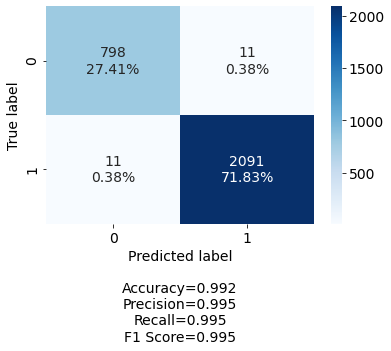

In [72]:
display_result(y_test_pt, test_preds_pt, True, raw_preds[:, 1])

In [73]:
run.join()

epoch,26
loss,0.01501
acc,0.99399
val_loss,0.02748
val_acc,0.99056
lr,0.0
_runtime,62
_timestamp,1622840632
_step,30
best_val_loss,0.02659
best_epoch,20


epoch,▁▁▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇██
loss,█▇▅▄▄▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
acc,▁▂▄▅▆▆▇▇▇▇▇▇▇█▇████████████
val_loss,█▅▄▃▃▃▂▂▂▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▆▆▇▆▇▇▇█▆████████████████
lr,█████████████████▂▂▂▂▁▁▁▁▁▁
_runtime,▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▇▇▇▇██████
_timestamp,▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▇▇▇▇██████
_step,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇███
Test Accuracy,▁
Test F1 Weighted,▁


### Predictions

In [74]:
save_predictions(original_model, X_test_pt, 'basic_cnn', 'test_ptb')
save_predictions(original_model, X_train_pt, 'basic_cnn', 'train_ptb')

# Basic RNN

## MIT BIH

#### W&B setup

In [80]:
run = wandb.init(
    project='ML4HC-project4',
    config={
        'epochs': 128,
        'batch_size': 32,
        'loss_function': 'sparse_categorical_crossentropy',
        'architecture': 'Basic RNN',
        'dataset': 'MITBIH',
        'mode': 'training',
        'ndim': 128,
        'rnn_dropout': 0.2,
        'dense_size': 128,
        'learning_rate': 1e-3,
        'schedule_lr': False
    })

config_mit = wandb.config

wandb: wandb version 0.10.31 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


#### Model

In [81]:
original_model = get_basic_rnn_model(config_mit, nclass=5)

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 187, 1)            4         
_________________________________________________________________
rec_1 (LSTM)                 (None, 128)               66560     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 128)             

In [82]:
file_path_mit = './models/basic_rnn/rnn_mitbih.h5'

checkpoint = ModelCheckpoint(
    file_path_mit, monitor='val_acc', verbose=1,
    save_best_only=True, mode='max')
early = EarlyStopping(
    monitor='val_acc', mode='max', patience=5, verbose=1)
redonplat = ReduceLROnPlateau(
    monitor='val_acc', mode='max', patience=3, verbose=2)

#### Training

In [83]:
history = original_model.fit(
    X_train_mit, y_train_mit,
    epochs=config_mit.epochs,
    batch_size=config_mit.batch_size,
    verbose=0,
    callbacks=[
        checkpoint, early, redonplat,
        WandbCallback(), TqdmCallback(verbose=1)],
    validation_split=0.1)



Epoch 00001: val_acc improved from -inf to 0.84171, saving model to ./models/basic_rnn/rnn_mitbih.h5

Epoch 00002: val_acc did not improve from 0.84171

Epoch 00003: val_acc did not improve from 0.84171

Epoch 00004: val_acc improved from 0.84171 to 0.89698, saving model to ./models/basic_rnn/rnn_mitbih.h5

Epoch 00005: val_acc did not improve from 0.89698

Epoch 00006: val_acc improved from 0.89698 to 0.95340, saving model to ./models/basic_rnn/rnn_mitbih.h5

Epoch 00007: val_acc did not improve from 0.95340

Epoch 00008: val_acc improved from 0.95340 to 0.96174, saving model to ./models/basic_rnn/rnn_mitbih.h5

Epoch 00009: val_acc did not improve from 0.96174

Epoch 00010: val_acc did not improve from 0.96174

Epoch 00011: val_acc did not improve from 0.96174

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00012: val_acc improved from 0.96174 to 0.96882, saving model to ./models/basic_rnn/rnn_mitbih.h5

Epoch 00013: val_acc did not improve 

In [84]:
original_model.load_weights(file_path_mit)

#### Evaluation

In [85]:
test_preds_mit = np.argmax(
    original_model.predict(X_test_mit, batch_size=512), axis=-1)

r = compute_metrics(y_test_mit, test_preds_mit)

f1_weighted = r['f1-weighted']
f1_macro = r['f1-macro']
acc = r['accuracy']
b_acc = r['balanced_accuracy']

wandb.log({'Test Accuracy': acc})
wandb.log({'Test F1 Weighted': f1_weighted})
wandb.log({'Test F1 Macro': f1_macro})
wandb.log({'Test Balanced Accuracy': b_acc})

f1 score micro:           0.97081
f1 score macro:           0.85412
f1 score weighted:        0.96966
accuracy score:           0.97081
balanced accuracy score:  0.82759


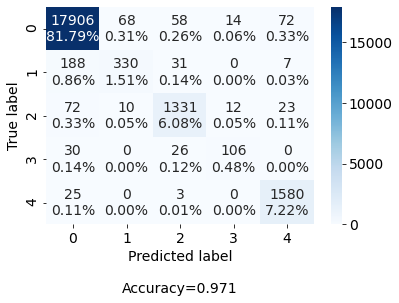

In [86]:
display_result(y_test_mit, test_preds_mit)

In [87]:
run.join()

epoch,19
loss,0.0885
acc,0.97509
val_loss,0.10484
val_acc,0.97293
lr,1e-05
_runtime,448
_timestamp,1622841214
_step,23
best_val_loss,0.10043
best_epoch,14


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▅▆▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
acc,▁▃▂▅▆▇▇▇▇▇██████████
val_loss,▃█▃▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
val_acc,▇▁▇▇▇███▇███████████
lr,███████████▂▂▂▂▂▂▂▁▁
_runtime,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██████
_timestamp,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██████
_step,▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇██
Test Accuracy,▁
Test F1 Weighted,▁


### Predictions

In [88]:
save_predictions(original_model, X_test_mit, 'basic_rnn', 'test_mitbih')
save_predictions(original_model, X_train_mit, 'basic_rnn', 'train_mitbih')

## PTBDB

#### W&B setup

In [116]:

run = wandb.init(
    project='ML4HC-project4',
    config={
        'epochs': 128,
        'batch_size': 32,
        'loss_function': 'sparse_categorical_crossentropy',
        'architecture': 'Basic RNN',
        'dataset': 'PTBDB',
        'mode': 'training',
        'ndim': 64,
        'rnn_dropout': 0.1,
        'dense_size': 32,
        'learning_rate': 1e-3,
        'schedule_lr': False
    })

config_pt = wandb.config

wandb: wandb version 0.10.31 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


#### Model

In [117]:
original_model = get_basic_rnn_model(config_pt, nclass=5)

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 187, 1)            4         
_________________________________________________________________
rec_1 (LSTM)                 (None, 64)                16896     
_________________________________________________________________
batch_normalization_25 (Batc (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_26 (Batc (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)              

In [118]:
file_path_pt = './models/basic_rnn/rnn_ptbdb.h5'

checkpoint = ModelCheckpoint(
    file_path_pt, monitor='val_acc', verbose=1,
    save_best_only=True, mode='max')
early = EarlyStopping(
    monitor='val_acc', mode='max', patience=5, verbose=1)
redonplat = ReduceLROnPlateau(
    monitor='val_acc', mode='max', patience=3, verbose=2)

#### Training

In [119]:
history = original_model.fit(
    X_train_pt, y_train_pt,
    epochs=config_pt.epochs,
    batch_size=config_pt.batch_size,
    verbose=0,
    callbacks=[
        checkpoint, early, redonplat,
        WandbCallback(), TqdmCallback(verbose=1)],
    validation_split=0.1)


Epoch 00001: val_acc improved from -inf to 0.69957, saving model to ./models/basic_rnn/rnn_ptbdb.h5

Epoch 00002: val_acc did not improve from 0.69957

Epoch 00003: val_acc did not improve from 0.69957

Epoch 00004: val_acc did not improve from 0.69957

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00005: val_acc improved from 0.69957 to 0.72361, saving model to ./models/basic_rnn/rnn_ptbdb.h5

Epoch 00006: val_acc improved from 0.72361 to 0.72876, saving model to ./models/basic_rnn/rnn_ptbdb.h5

Epoch 00007: val_acc improved from 0.72876 to 0.73047, saving model to ./models/basic_rnn/rnn_ptbdb.h5

Epoch 00008: val_acc did not improve from 0.73047

Epoch 00009: val_acc did not improve from 0.73047

Epoch 00010: val_acc improved from 0.73047 to 0.73476, saving model to ./models/basic_rnn/rnn_ptbdb.h5

Epoch 00011: val_acc improved from 0.73476 to 0.74249, saving model to ./models/basic_rnn/rnn_ptbdb.h5

Epoch 00012: val_acc improved from 0.7424

In [120]:
original_model.load_weights(file_path_pt)


#### Evaluation

In [121]:
raw_preds = original_model.predict(X_test_pt, batch_size=512)
test_preds_pt = np.argmax(raw_preds, axis=-1)

r = compute_metrics(y_test_pt, test_preds_pt)

f1_weighted = r['f1-weighted']
f1_macro = r['f1-macro']
acc = r['accuracy']
b_acc = r['balanced_accuracy']

wandb.log({'Test Accuracy': acc})
wandb.log({'Test F1 Weighted': f1_weighted})
wandb.log({'Test F1 Macro': f1_macro})
wandb.log({'Test Balanced Accuracy': b_acc})

f1 score micro:           0.76056
f1 score macro:           0.70493
f1 score weighted:        0.76184
accuracy score:           0.76056
balanced accuracy score:  0.70723
AuPR score:               0.92102
AuROC score:              0.81197


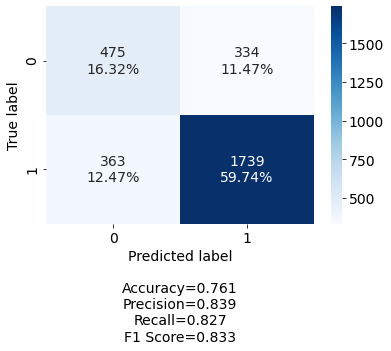

In [122]:
display_result(y_test_pt, test_preds_pt, True, raw_preds[:, 1])

In [123]:
run.join()

epoch,20
loss,0.45761
acc,0.77081
val_loss,0.46472
val_acc,0.76652
lr,1e-05
_runtime,65
_timestamp,1622841647
_step,24
best_val_loss,0.46254
best_epoch,16


epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
loss,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,▁▆▆▆▆▇▆▇▇▇▆▇▇▇▇▇█▇███
val_loss,▇▄▇█▂▂▂▂▂▂▂▂▁▂▂▂▁▂▁▁▁
val_acc,▆▅▁▆▇▇▇▇▇▇▇▇▇▇███████
lr,████▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁
_runtime,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇█████
_timestamp,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇█████
_step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
Test Accuracy,▁
Test F1 Weighted,▁


### Predictions

In [124]:
save_predictions(original_model, X_test_pt, 'basic_rnn', 'test_ptb')
save_predictions(original_model, X_train_pt, 'basic_rnn', 'train_ptb')
